<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [1]:
#!pip install pandas
#!pip install matplotlib
#!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [2]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head(10)


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN
5,6,I code primarily as a hobby,Under 18 years old,"Student, full-time",NaN,Apples,NaN,Primary/elementary school,"School (i.e., University, College, etc);Online...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
6,7,"I am not primarily a developer, but I write co...",35-44 years old,"Employed, full-time",Remote,Apples,I don’t code outside of work,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Stack Overflow;Written...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Neither easy nor difficult,NaN,NaN
7,8,I am learning to code,18-24 years old,"Student, full-time;Not employed, but looking f...",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Video-based Online Cou...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Difficult,NaN,NaN
8,9,I code primarily as a hobby,45-54 years old,"Employed, full-time",In-person,Apples,Hobby,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",Books / Physical media;Other online resources ...,Stack Overflow;Written-based Online Courses,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,NaN,NaN
9,10,I am a developer by profession,35-44 years old,"Independent contractor, freelancer, or self-em...",Remote,Apples,Bootstrapping a business,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


C:\Users\akash dangi\AppData\Local\Temp\ipykernel_2560\221341151.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df,x = df['MainBranch'], y = df['ResponseId'], palette = 'viridis')


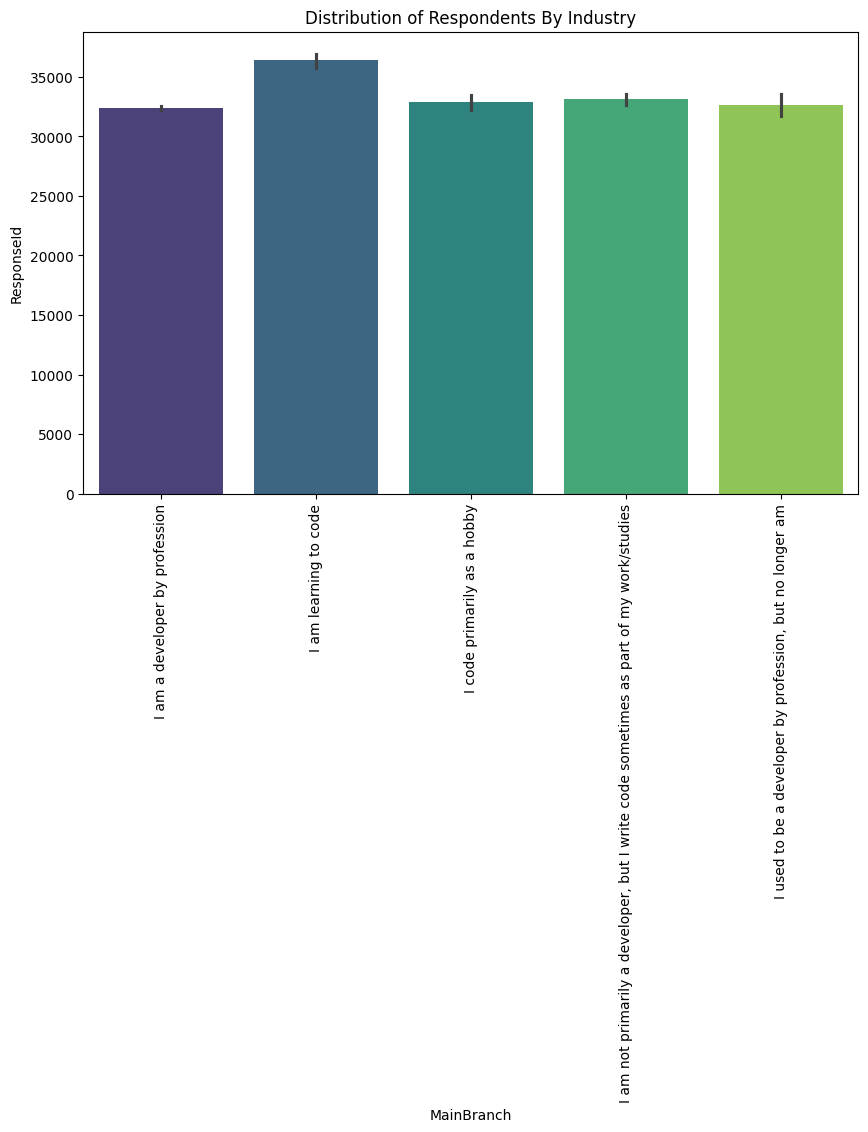

In [20]:
##Write your code here
plt.figure(figsize=(10, 6))
sns.barplot(data = df,x = df['MainBranch'], y = df['ResponseId'], palette = 'viridis')
plt.xticks(rotation = 90)
plt.title("Distribution of Respondents By Industry")
plt.show()

<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [14]:
##Write your code here
# Step 1: Calculate basic statistics
mean_comp = df['ConvertedCompYearly'].mean()
median_comp = df['ConvertedCompYearly'].median()
std_comp = df['ConvertedCompYearly'].std()

print(f"Mean Compensation: {mean_comp:.2f}")
print(f"Median Compensation: {median_comp:.2f}")
print(f"Standard Deviation: {std_comp:.2f}")

Mean Compensation: 86155.29
Median Compensation: 65000.00
Standard Deviation: 186756.97


In [15]:
# Step 2: Define a threshold for extremely high compensation
threshold = mean_comp + 3 * std_comp
print(f"Threshold for Extremely High Compensation: {threshold:.2f}")


Threshold for Extremely High Compensation: 646426.21


In [18]:
# Step 3: Identify respondents with compensation exceeding the threshold
extreme_comp = df[df['ConvertedCompYearly'] > threshold]
print(f"Number of Respondents with Extremely High Compensation: {len(extreme_comp)}")
print(extreme_comp[['ResponseId', 'ConvertedCompYearly']])


Number of Respondents with Extremely High Compensation: 89
       ResponseId  ConvertedCompYearly
529           530             650000.0
828           829            1000000.0
1932         1933             945000.0
2171         2172             750000.0
2187         2188            2000000.0
...           ...                  ...
38219       38220            1000000.0
39643       39644            1300000.0
40066       40067             800000.0
40952       40953             750000.0
41027       41028             700000.0

[89 rows x 2 columns]


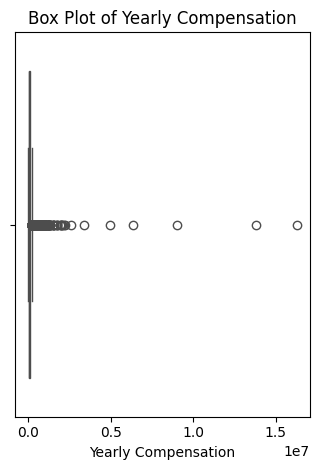

In [19]:
# Box plot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['ConvertedCompYearly'].dropna(), color='orange')
plt.title('Box Plot of Yearly Compensation')
plt.xlabel('Yearly Compensation')

plt.tight_layout()
plt.show()

<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


In [24]:
##Write your code here
# Step 1: Calculate the IQR
Q1 = df['ConvertedCompYearly'].quantile(0.25)  # First quartile (25th percentile)
Q3 = df['ConvertedCompYearly'].quantile(0.75)  # Third quartile (75th percentile)
IQR = Q3 - Q1
print(f"First Quartile (Q1): {Q1:.2f}")
print(f"Third Quartile (Q3): {Q3:.2f}")
print(f"Interquartile Range (IQR): {IQR:.2f}")


First Quartile (Q1): 32712.00
Third Quartile (Q3): 107971.50
Interquartile Range (IQR): 75259.50


In [25]:
# Step 2: Determine the upper and lower bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound for Outliers: {lower_bound:.2f}")
print(f"Upper Bound for Outliers: {upper_bound:.2f}")

Lower Bound for Outliers: -80177.25
Upper Bound for Outliers: 220860.75


In [27]:
# Step 3: Identify outliers
outliers = df[(df['ConvertedCompYearly'] < lower_bound) | (df['ConvertedCompYearly'] > upper_bound)]
print(f"Number of Outliers: {len(outliers)}")
print(outliers[['ResponseId', 'ConvertedCompYearly']])


Number of Outliers: 978
       ResponseId  ConvertedCompYearly
428           429             230000.0
456           457             300000.0
461           462             254425.0
529           530             650000.0
545           546             400000.0
...           ...                  ...
40952       40953             750000.0
41000       41001             235000.0
41001       41002             260000.0
41027       41028             700000.0
41187       41188             222834.0

[978 rows x 2 columns]


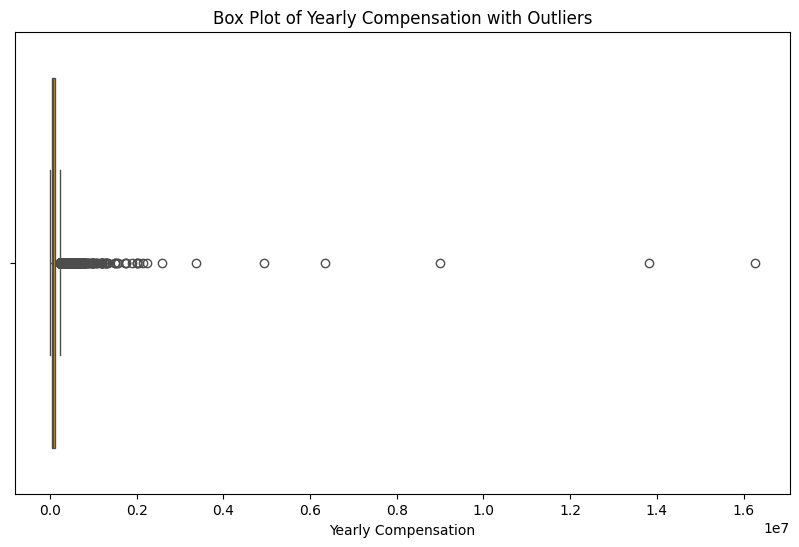

In [28]:
# Step 4: Visualize outliers using a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['ConvertedCompYearly'].dropna(), color='orange')
plt.title('Box Plot of Yearly Compensation with Outliers')
plt.xlabel('Yearly Compensation')
plt.show()

<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


In [38]:
##Write your code here
# Create a new DataFrame *excluding* outliers
df_no_outliers = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)]

# Validate the size of the new DataFrame
print(f"Original DataFrame size: {len(df)}")
print(f"DataFrame size after removing outliers: {len(df_no_outliers)}")

Original DataFrame size: 65437
DataFrame size after removing outliers: 22457


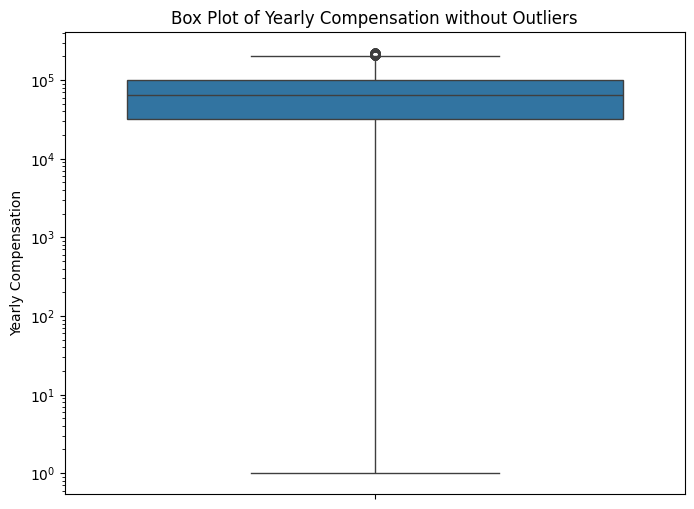

In [39]:
# Visualize the data without outliers with a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(y='ConvertedCompYearly', data=df_no_outliers)
plt.title('Box Plot of Yearly Compensation without Outliers')
plt.ylabel('Yearly Compensation')
plt.yscale('log') # Use logarithmic scale for better visualization of spread
plt.show()

<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


In [ ]:
##Write your code here

<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
